In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, mean_absolute_error , mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score

In [ ]:
lung_cancer = pd.read_csv("lung cancer.csv")

In [ ]:
lung_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
lung_cancer.shape

(309, 16)

In [ ]:
lung_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
lung_cancer.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
lung_cancer.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
#label_encoder = preprocessing.LabelEncoder()

#lung_cancer["GENDER"] = label_encoder.fit_transform(lung_cancer["GENDER"])
#lung_cancer["LUNG_CANCER"] = label_encoder.fit_transform(lung_cancer["LUNG_CANCER"])

In [ ]:
print(lung_cancer.GENDER.value_counts())

M    162
F    147
Name: GENDER, dtype: int64


In [ ]:
lung_cancer.replace({"GENDER": {"M": 0, "F": 1}}, inplace = True)

In [ ]:
print(lung_cancer.LUNG_CANCER.value_counts())

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64


In [ ]:
lung_cancer.replace({"LUNG_CANCER": {"NO": 0, "YES": 1}}, inplace = True)

In [ ]:
lung_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
lung_cancer.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
lung_cancer = lung_cancer[["GENDER","AGE","SMOKING", "YELLOW_FINGERS", "ANXIETY",
       "PEER_PRESSURE", "CHRONIC DISEASE", "FATIGUE ", "ALLERGY ", "WHEEZING",
       "ALCOHOL CONSUMING", "COUGHING", "SHORTNESS OF BREATH",
       "SWALLOWING DIFFICULTY", "CHEST PAIN", "LUNG_CANCER"]]

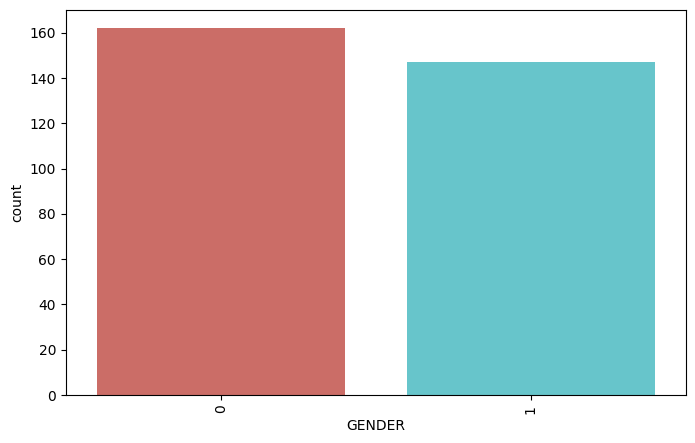

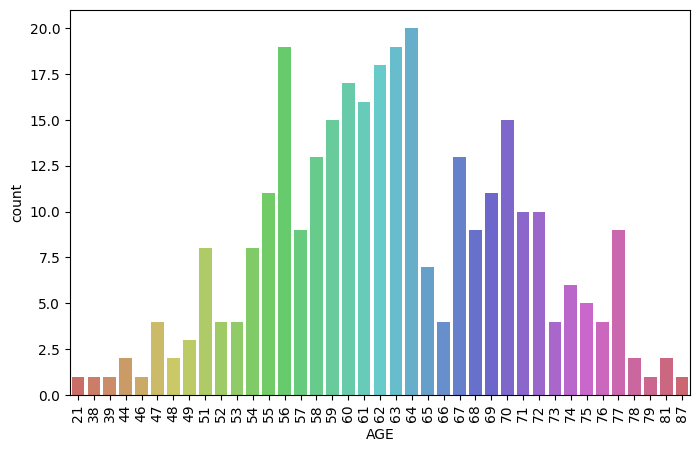

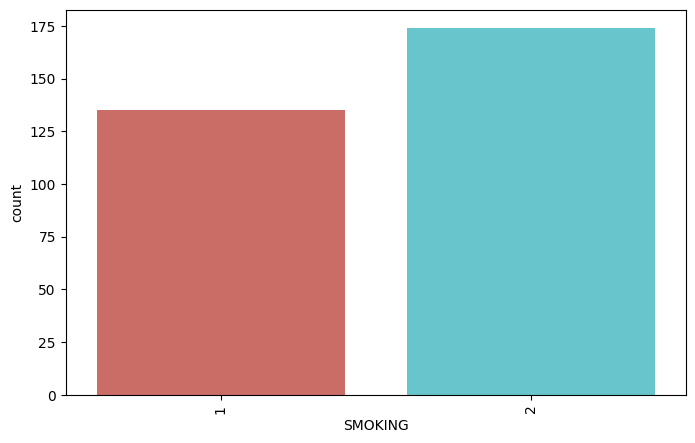

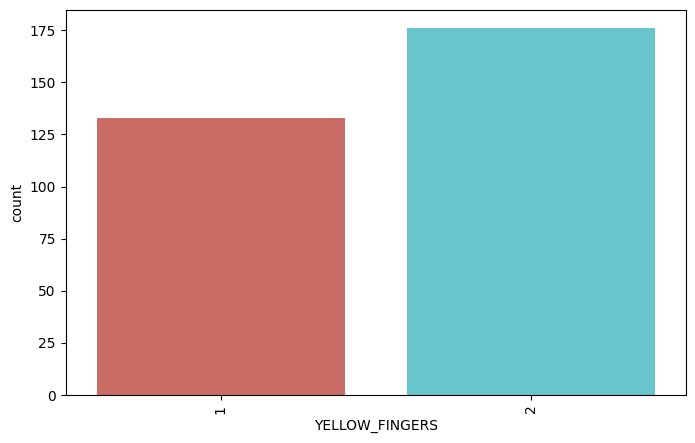

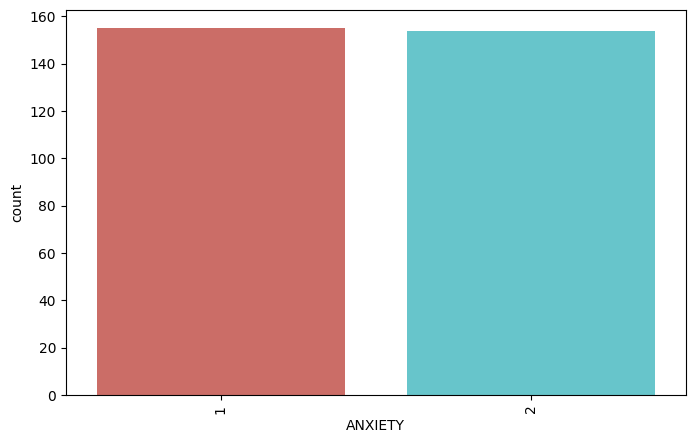

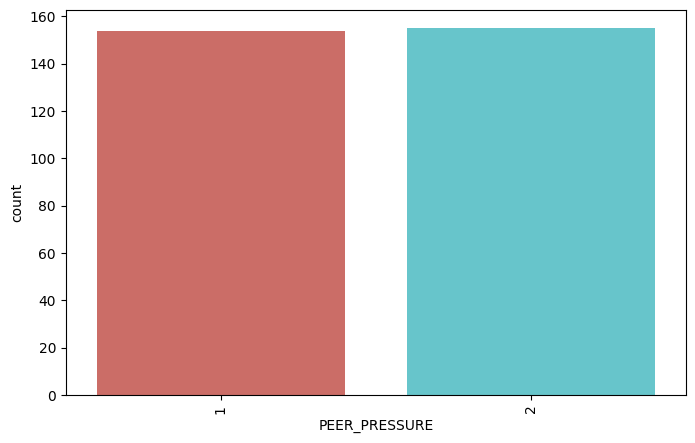

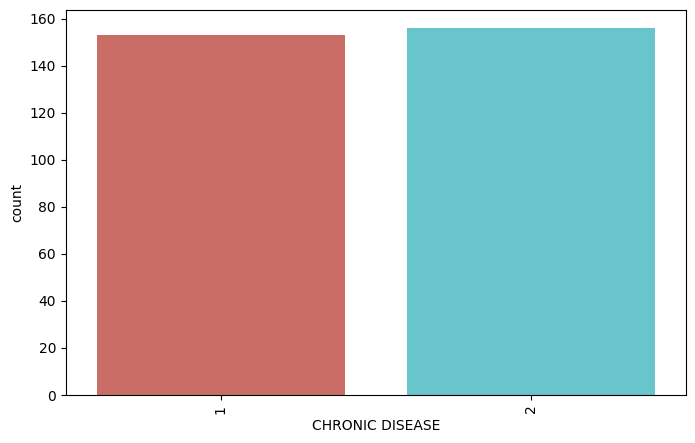

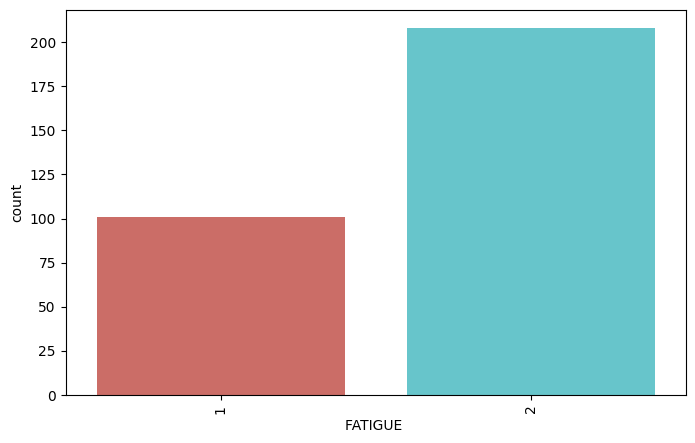

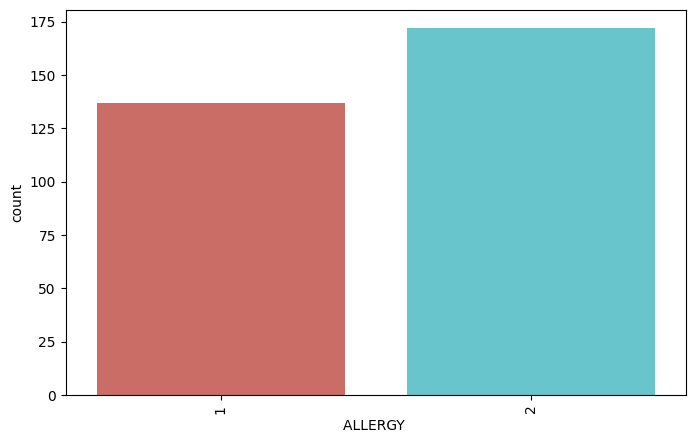

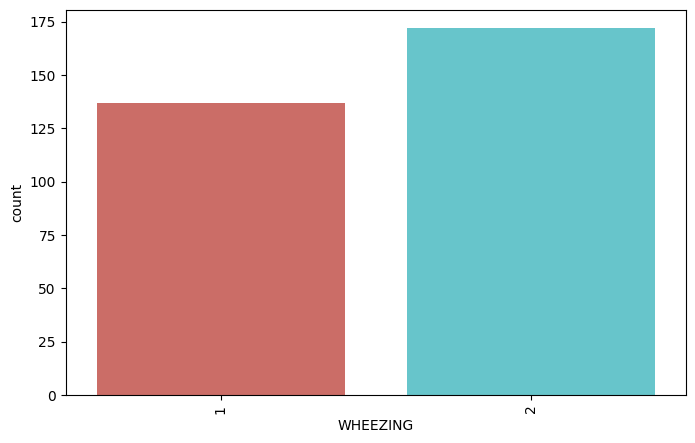

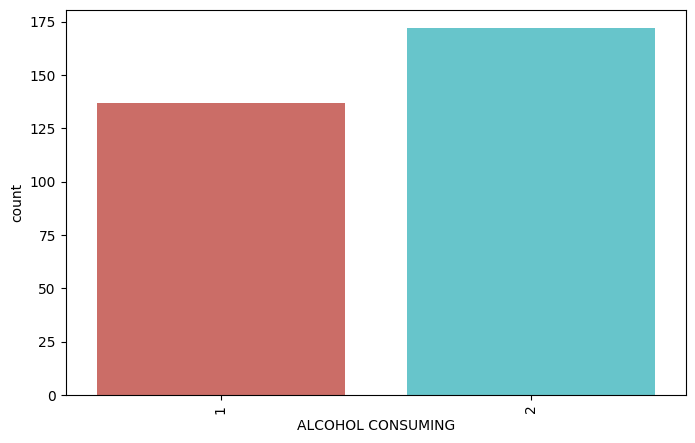

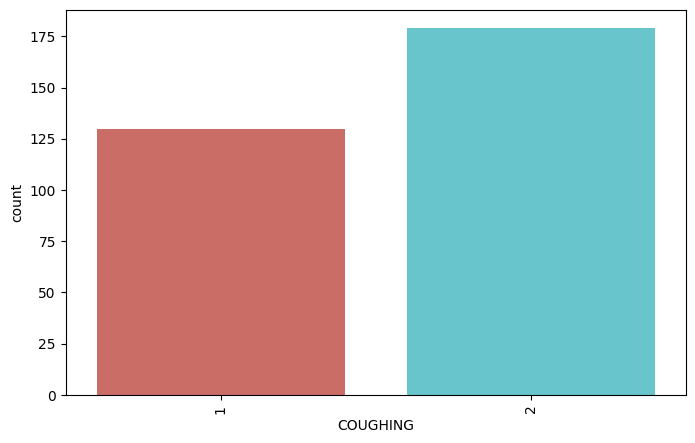

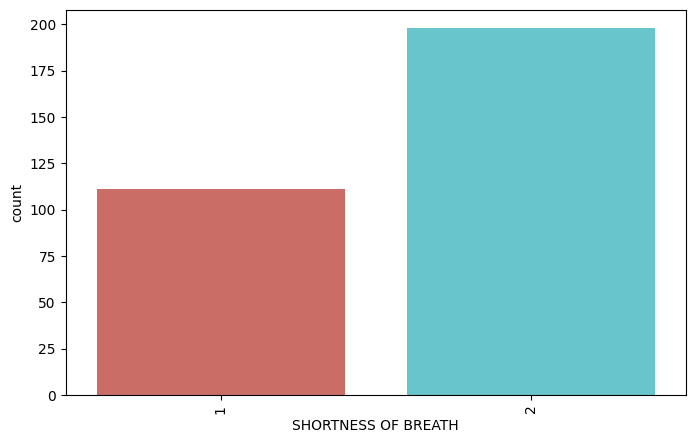

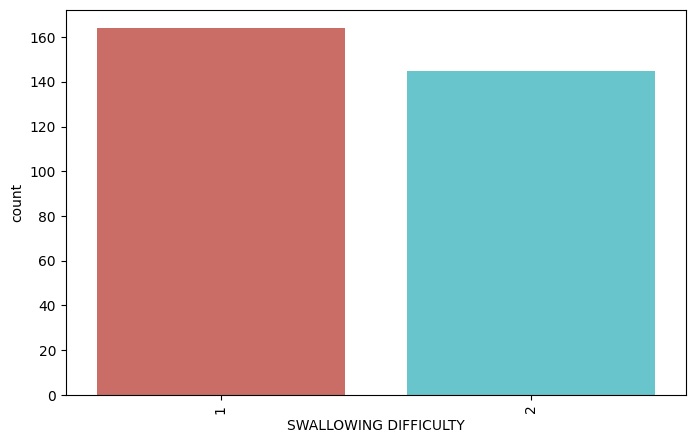

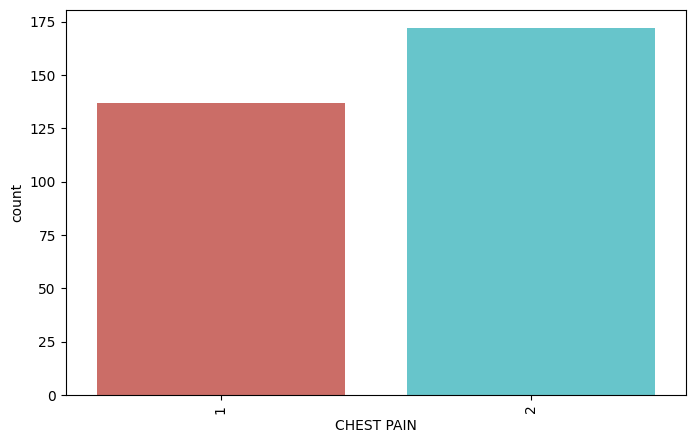

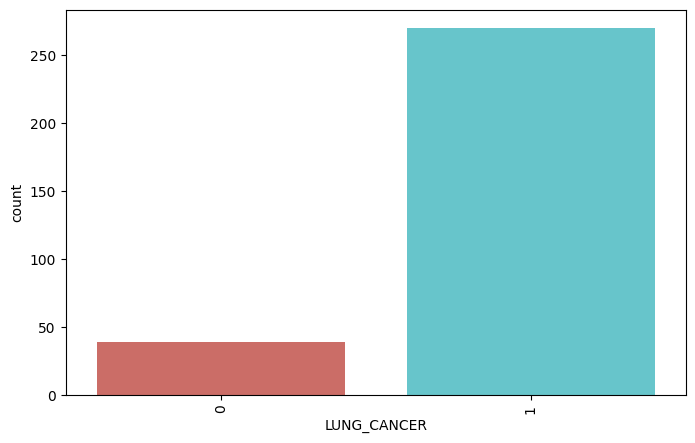

In [ ]:
for i in lung_cancer.columns:
    
    plt.figure(figsize = (8,5))
    
    sns.countplot(x = lung_cancer[i], data = lung_cancer, palette = "hls")
    plt.xticks(rotation = 90)

plt.show()
    

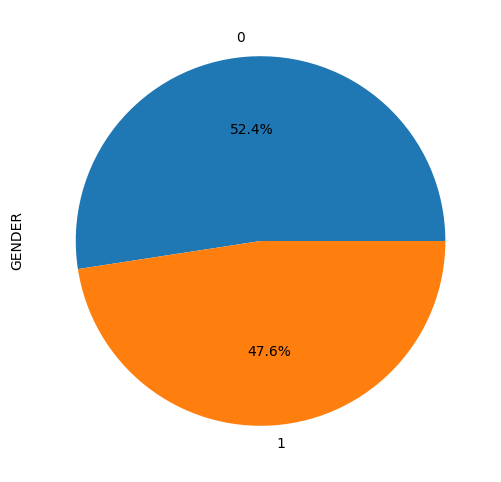

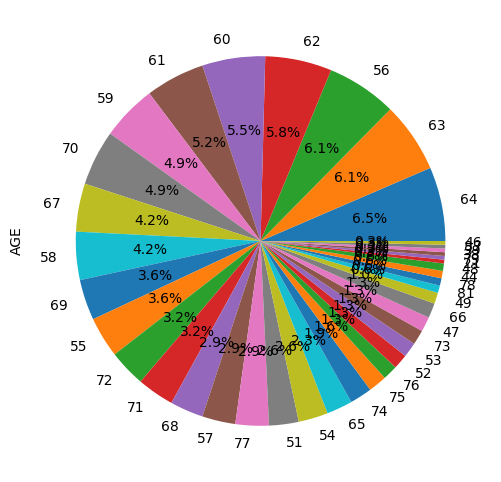

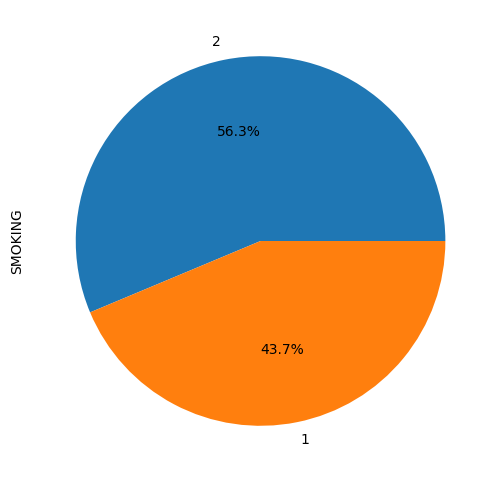

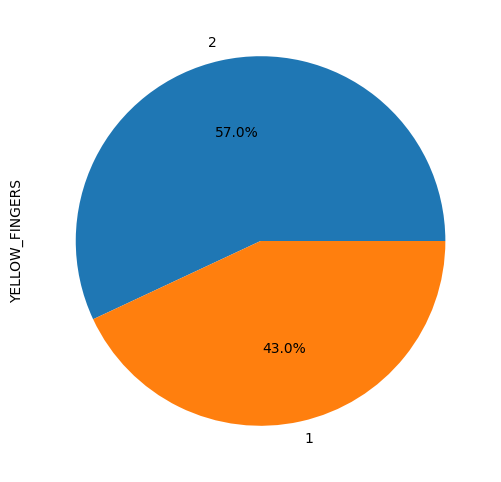

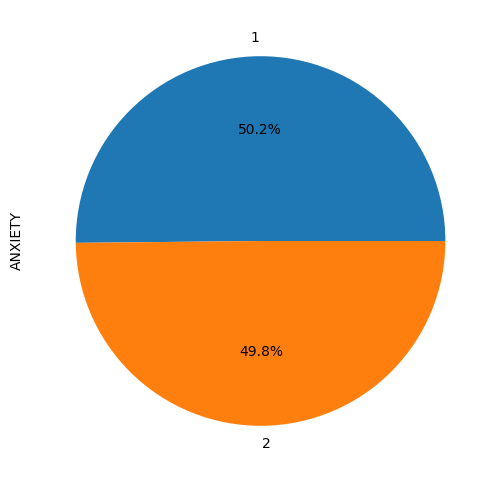

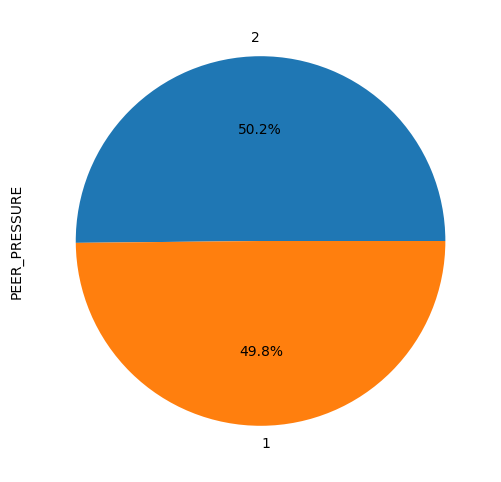

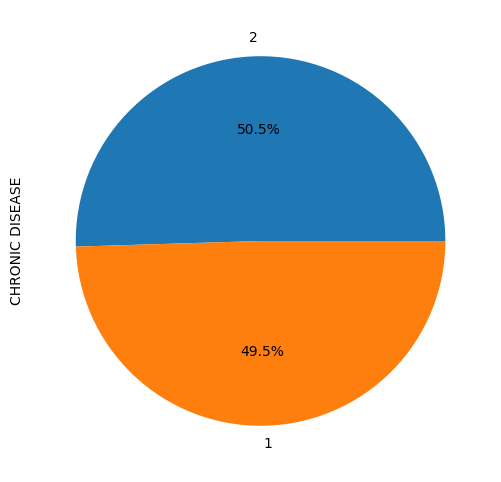

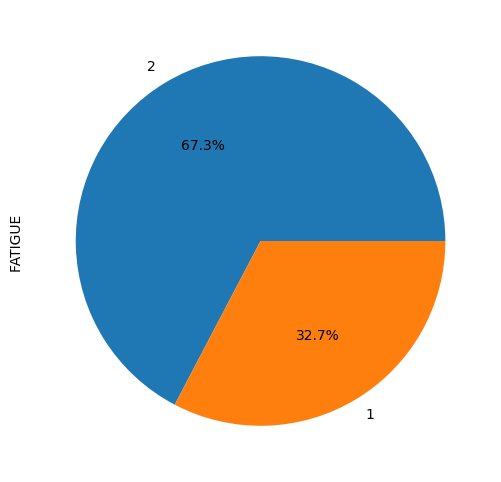

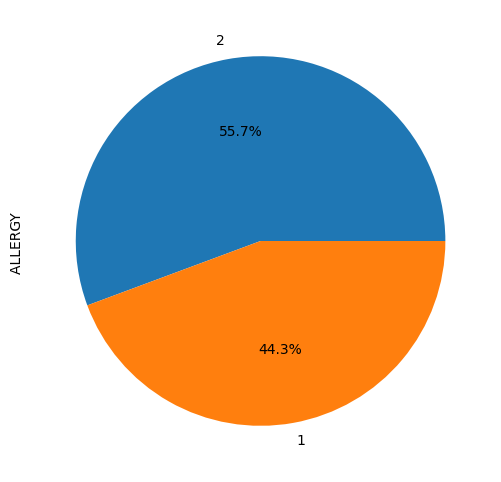

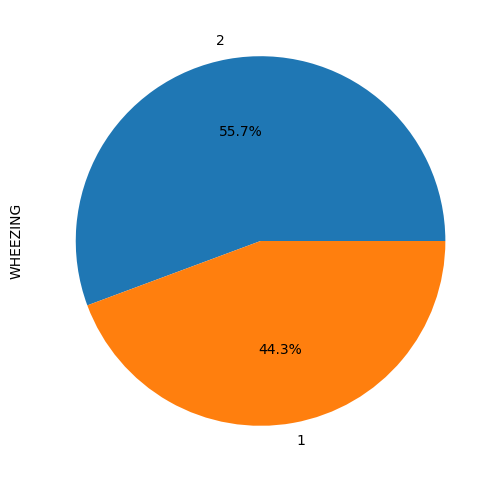

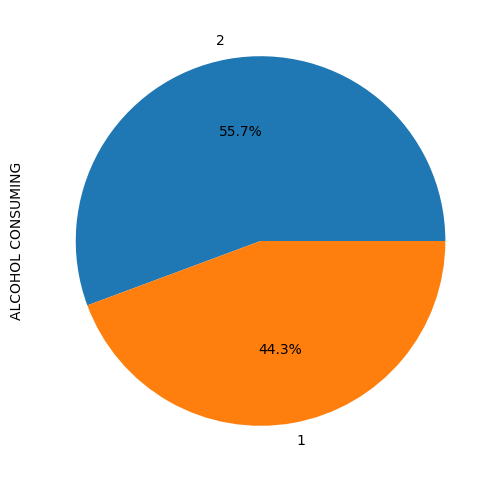

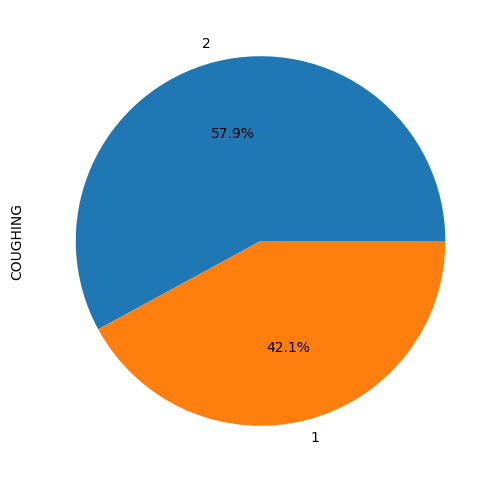

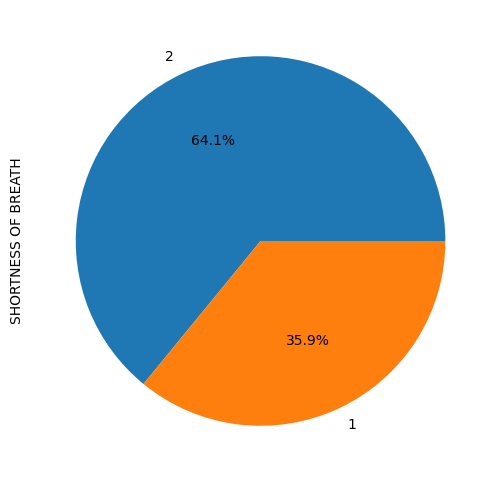

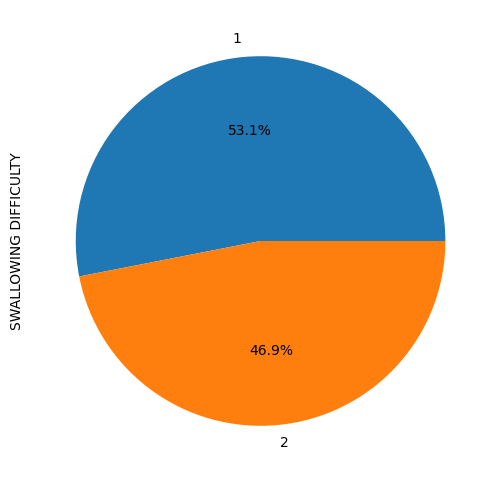

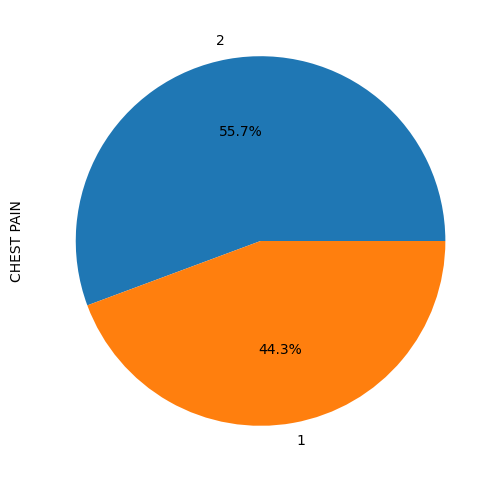

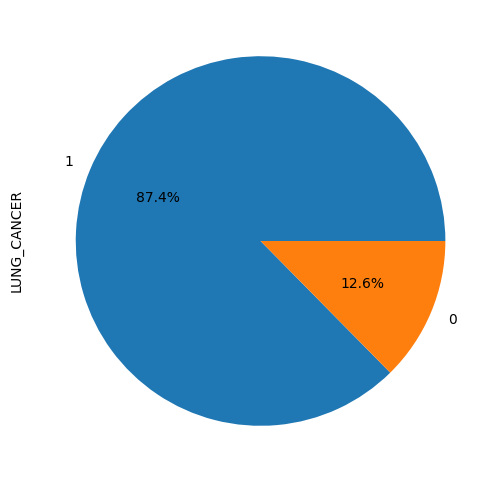

In [ ]:
for i in lung_cancer.columns:
    
    lung_cancer[i].value_counts().plot(kind = "pie", figsize = (6,6), autopct = "%1.1f%%")
    plt.xticks(rotation = 45)
    plt.show()

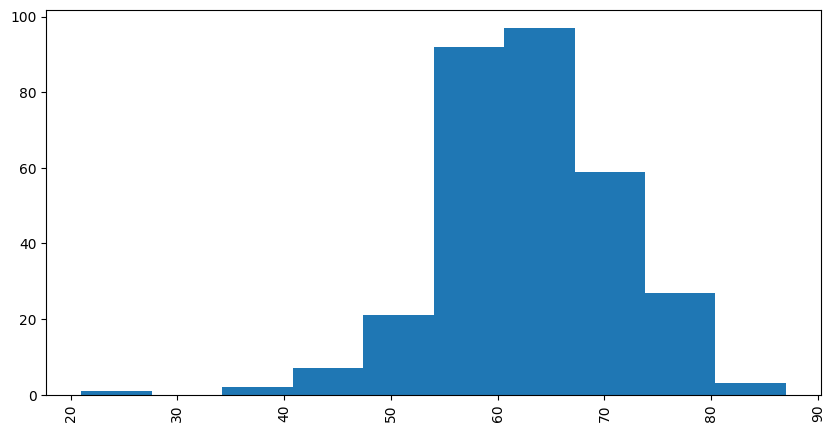

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(x = "AGE", data = lung_cancer)
plt.xticks(rotation = 90)
plt.show()

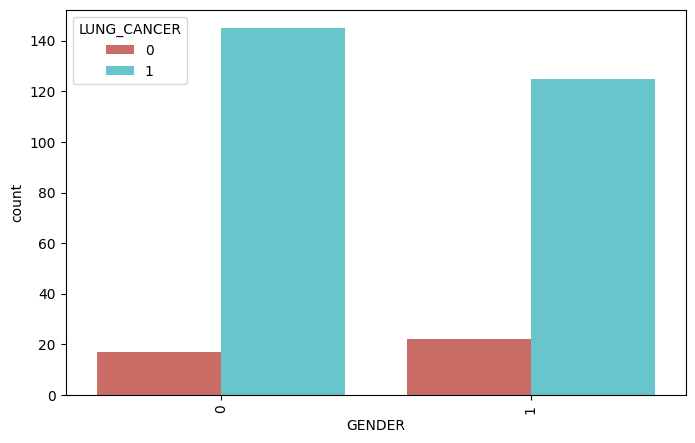

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x = "GENDER", data = lung_cancer, hue = "LUNG_CANCER", palette = "hls")
plt.xticks(rotation = 90)
plt.show()

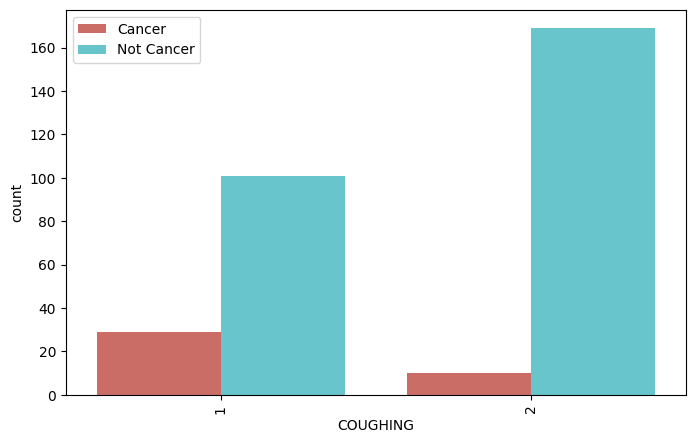

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x = "COUGHING", data = lung_cancer, hue = "LUNG_CANCER", palette = "hls")
plt.legend(["Cancer", "Not Cancer"])
plt.xticks(rotation = 90)
plt.show()

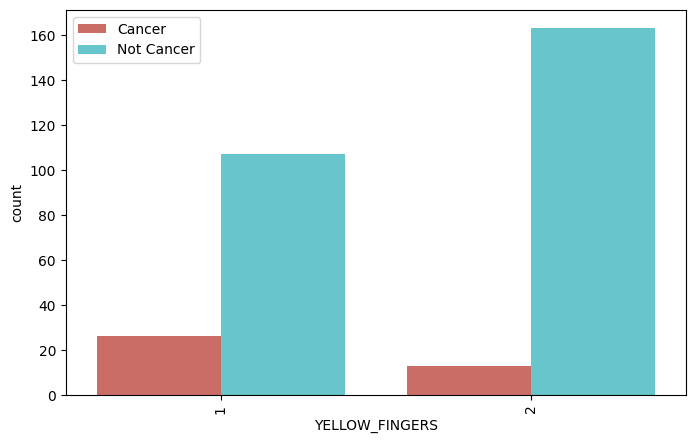

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x = "YELLOW_FINGERS", data = lung_cancer, hue = "LUNG_CANCER", palette = "hls")
plt.legend(["Cancer", "Not Cancer"])
plt.xticks(rotation = 90)
plt.show()

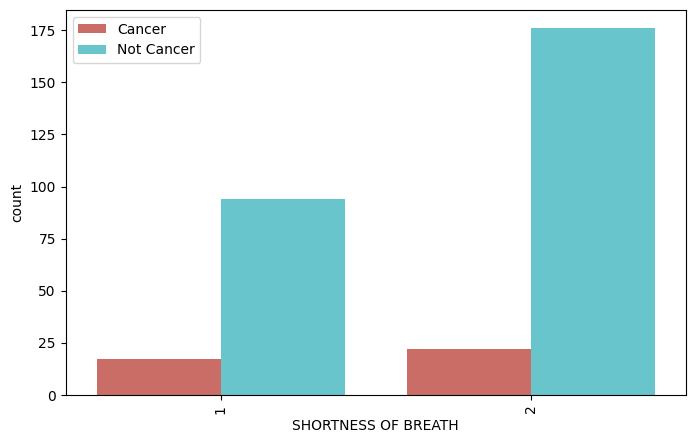

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x = "SHORTNESS OF BREATH", data = lung_cancer, hue = "LUNG_CANCER", palette = "hls")
plt.legend(["Cancer", "Not Cancer"])
plt.xticks(rotation = 90)
plt.show()

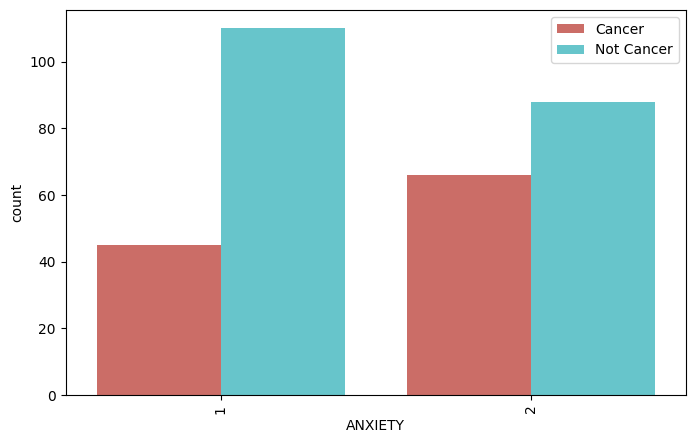

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x = "ANXIETY", data = lung_cancer, hue = "SHORTNESS OF BREATH", palette = "hls")
plt.legend(["Cancer", "Not Cancer"])
plt.xticks(rotation = 90)
plt.show()

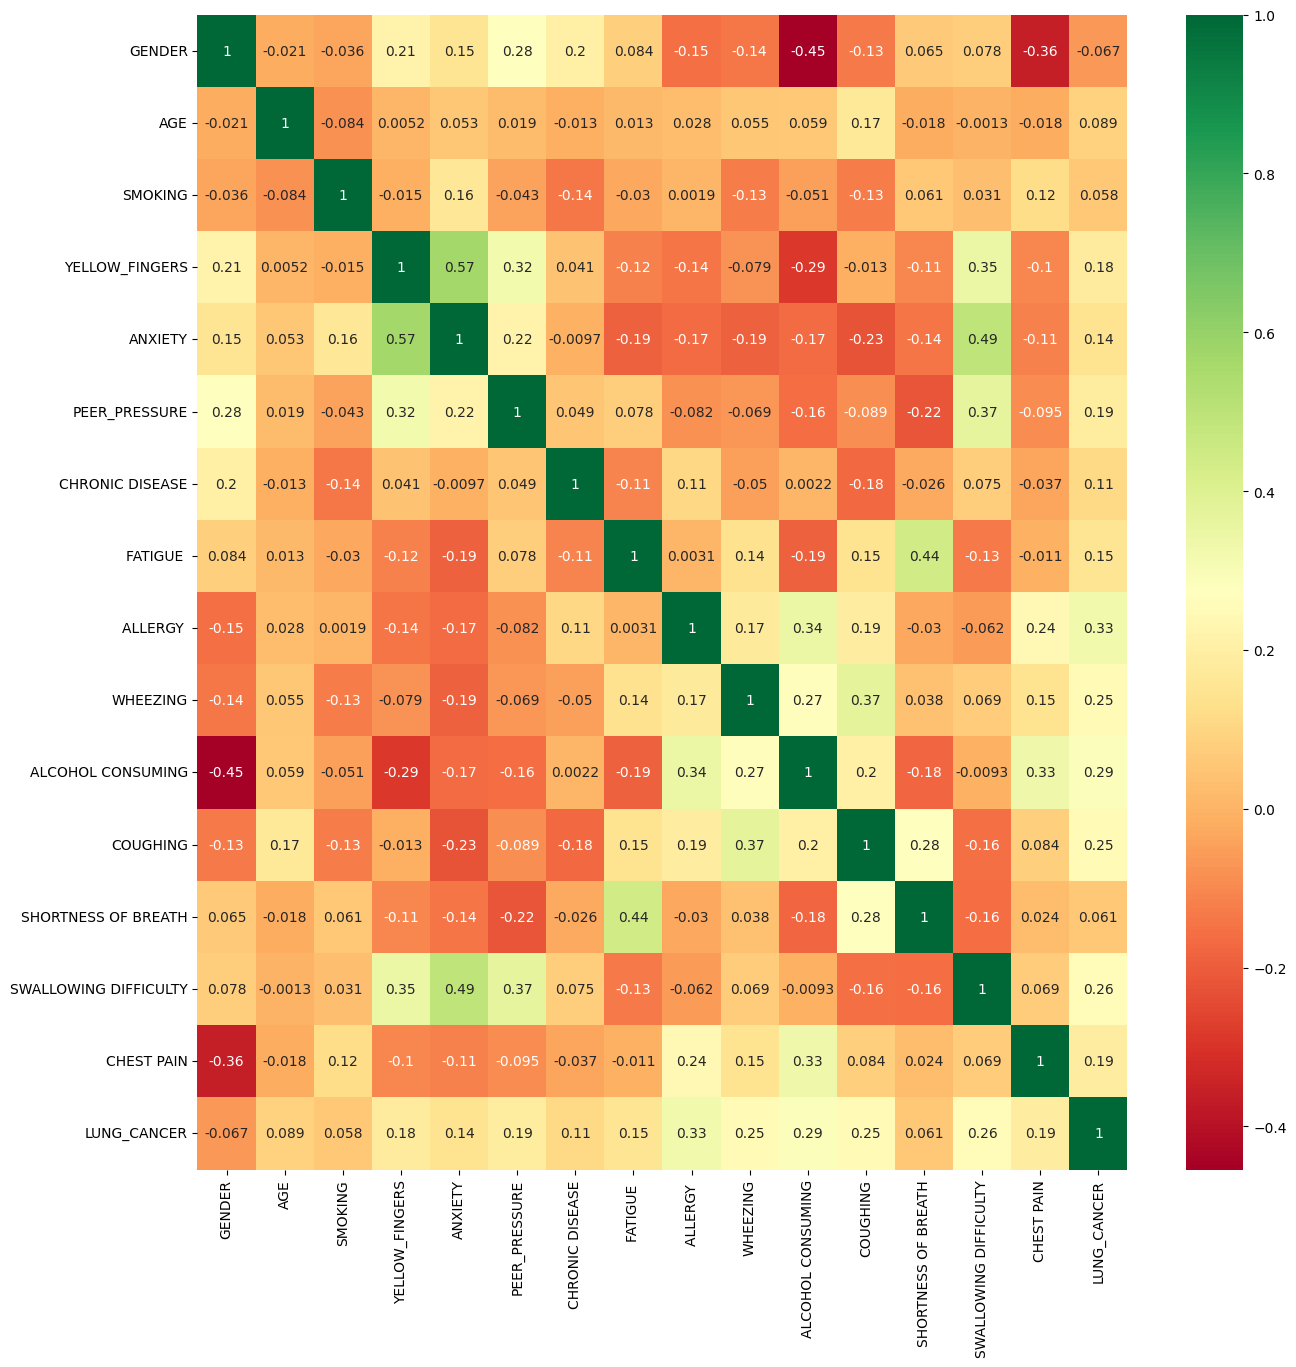

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(lung_cancer.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [ ]:
X = lung_cancer.drop(columns = "LUNG_CANCER", axis = 1)
Y = lung_cancer["LUNG_CANCER"]

In [ ]:
print(X)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         0   69        1               2        2              1   
1         0   74        2               1        1              1   
2         1   59        1               1        1              2   
3         0   63        2               2        2              1   
4         1   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       1   56        1               1        1              2   
305       0   70        2               1        1              1   
306       0   58        2               1        1              1   
307       0   67        2               1        2              1   
308       0   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2     

In [ ]:
print(Y)

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3, stratify = Y)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(309, 15) (247, 15) (62, 15)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print("Accuracy on Training Data: ", training_data_accuracy)

Accuracy on Training Data:  0.9392712550607287


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Test Data:  0.9032258064516129


In [ ]:
test_data_accuracy = round(accuracy_score(X_test_prediction, Y_test)*100,2)

print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Test Data:  90.32


In [ ]:
print("Mean Absolute Error: ", (mean_absolute_error(Y_test, X_test_prediction)))

Mean Absolute Error:  0.0967741935483871


In [ ]:
print("Mean Squared Error: ", (mean_squared_error(Y_test, X_test_prediction)))

Mean Squared Error:  0.0967741935483871


In [ ]:
print("Median Absolute Error: ", (median_absolute_error(Y_test, X_test_prediction)))

Median Absolute Error:  0.0


In [ ]:
print("F1 Score: ", (f1_score(Y_test, X_test_prediction)))

F1 Score:  0.9464285714285714


In [ ]:
X_test.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
201,1,60,1,1,1,1,2,2,2,1,1,2,2,1,2
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2
216,1,67,2,2,2,2,2,2,1,1,1,1,2,2,1
208,0,67,1,2,2,2,1,2,2,1,1,2,1,2,1
258,0,70,2,1,2,1,1,2,2,1,2,2,2,1,2


In [ ]:
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
291,0,71,2,2,2,1,2,1,2,2,2,2,1,2,2
7,1,51,2,2,2,2,1,2,2,1,1,1,2,2,1
222,1,77,1,1,1,2,2,2,2,2,2,1,1,1,2
220,1,57,1,1,2,2,2,2,2,2,2,1,2,2,2
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2


In [ ]:
input_values =(1,57,2,2,1,1,1,1,1,1,1,1,2,1,1)


input_values_as_numpy_array = np.asarray(input_values)
input_values_reshaped = input_values_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_values_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("This Person has not Lung Cancer.")
else:
    print("This Person has Lung Cancer.")
    

[0]
This Person has not Lung Cancer.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
filename = "lung_cancer_model.sav"
pickle.dump(model, open(filename, "wb"))

In [ ]:
loaded_model = pickle.load(open("lung_cancer_model.sav", "rb"))

In [ ]:
input_values =(1,57,2,2,1,1,1,1,1,1,1,1,2,1,1)


input_values_as_numpy_array = np.asarray(input_values)

input_values_reshaped = input_values_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_values_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("This Person has not Lung Cancer.")
else:
    print("This Person has Lung Cancer.")

[0]
This Person has not Lung Cancer.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
